In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from time import time
from gensim.models.phrases import Phrases, Phraser
import spacy  # For preprocessing
import en_core_web_sm

## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

## for explainer
from lime import lime_text

## for word embedding
import gensim
import gensim.downloader as gensim_api


Bad key savefig.frameon in file C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably nee

In [8]:
pd.read_csv('train.csv')

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (60,216,266,286,287,298,299,300,301,302,303,304,305,306,307,320,321,322,323,324,325,326,327,328,329,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,coordinates.type,coordinates.coordinates,retweeted_status.geo.type,retweeted_status.geo.coordinates,retweeted_status.coordinates.type,retweeted_status.coordinates.coordinates,quoted_status.user.withheld_in_countries,quoted_status.withheld_in_countries,0,1
0,0,Fri Oct 16 04:25:16 +0000 2020,1316958361905188864,1316958361905188864,RT @nytimes: If you missed Joe Biden's town ha...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316958353482985474,0.045455
1,1,Fri Oct 16 04:25:16 +0000 2020,1316958365034156032,1316958365034156032,RT @ConsciousEvolu1: CONFIRMED! Gilead's REMSD...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316958353667592193,0.000000
2,2,Fri Oct 16 04:25:14 +0000 2020,1316958357056573440,1316958357056573440,RT @greglaurie: It’s encouraging to me to hear...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316958353948540929,-0.155556
3,3,Fri Oct 16 04:25:15 +0000 2020,1316958359933898754,1316958359933898754,RT @CNN: Facts First: Trump’s claim is false. ...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316958353982181377,-0.333333
4,4,Fri Oct 16 04:25:14 +0000 2020,1316958355886321666,1316958355886321666,RT @TheLeoTerrell: Just once in your life try ...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316958354078617605,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90248,90248,Fri Oct 16 05:24:00 +0000 2020,1316973143777546240,1316973143777546240,A thread comparing US COVID19 experience with ...,False,"<a href=""https://twitterrific.com/ios"" rel=""no...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316972693821005825,-0.800000
90249,90249,Fri Oct 16 05:24:01 +0000 2020,1316973150815518720,1316973150815518720,RT @cleololitax: MY 21st BIRTHDAY IS \n ...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316972694022356992,0.200000
90250,90250,Fri Oct 16 05:24:02 +0000 2020,1316973153730629632,1316973153730629632,RT @HillaryClinton: Americans are going hungry...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316972694009745409,0.356818
90251,90251,Fri Oct 16 05:24:02 +0000 2020,1316973154087145473,1316973154087145473,As covid-19 pandemic seems to be in control no...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316972694177460225,-0.100000


In [9]:
df = pd.read_csv('train.csv')
df.columns

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (60,216,266,286,287,298,299,300,301,302,303,304,305,306,307,320,321,322,323,324,325,326,327,328,329,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'created_at', 'id', 'id_str', 'text', 'truncated',
       'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id',
       ...
       'coordinates.type', 'coordinates.coordinates',
       'retweeted_status.geo.type', 'retweeted_status.geo.coordinates',
       'retweeted_status.coordinates.type',
       'retweeted_status.coordinates.coordinates',
       'quoted_status.user.withheld_in_countries',
       'quoted_status.withheld_in_countries', '0', '1'],
      dtype='object', length=353)

In [10]:
df['text']

0        RT @nytimes: If you missed Joe Biden's town ha...
1        RT @ConsciousEvolu1: CONFIRMED! Gilead's REMSD...
2        RT @greglaurie: It’s encouraging to me to hear...
3        RT @CNN: Facts First: Trump’s claim is false. ...
4        RT @TheLeoTerrell: Just once in your life try ...
                               ...                        
90248    A thread comparing US COVID19 experience with ...
90249    RT @cleololitax: MY 21st BIRTHDAY IS \n       ...
90250    RT @HillaryClinton: Americans are going hungry...
90251    As covid-19 pandemic seems to be in control no...
90252    RT @CumbackNiMagnus: Fret not if we have been ...
Name: text, Length: 90253, dtype: object

In [11]:
nlp = en_core_web_sm.load()

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
#https://spacy.io/usage/linguistic-features
    #Text: The original word text.
    #Lemma: The base form of the word.
    #POS: The simple UPOS part-of-speech tag.
    #Tag: The detailed part-of-speech tag.
    #Dep: Syntactic dependency, i.e. the relation between tokens.
    #Shape: The word shape – capitalization, punctuation, digits.
    #is alpha: Is the token an alpha character?
    #is stop: Is the token part of a stop list, i.e. the most common words of the language?

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

    
# re - regex sub    
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['text'])

In [12]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.21 mins


In [13]:
txt[:10]

['rt nytime miss joe biden town hall say coronavirus vaccine available year ackn',
 'rt consciousevolu confirm gilead remsdesivir c vaccine illegally own trump baric nih et al fail large cli',
 'rt greglaurie s encouraging hear realdonaldtrump acknowledge need god s help life country face',
 'rt cnn fact trump s claim false cdc study release september people wear mask infect',
 'rt theleoterrell life try fair trump sharp intelligent true principle opinion lack ob',
 '  popbase second pandemic arrive',
 'rt beowulf week ago trump hold rally mile village county previously virtually covid free massiv',
 'rt drestradamus lockdown covid hoax https t co bn q apo',
 '  jaythebird makersmike alyssa milano yep people brainwash fear facemask win t pr https t co xmbkdtsh',
 'rt thedailyshow biden detailed plan combat covid trump qanon actually discover osama bin laden alive pho']

In [15]:
df['sentiment'] = df['1']

In [17]:
from gensim.models.phrases import Phrases, Phraser
df_clean = pd.DataFrame({'text':df['text'],'text_clean':txt,'sentiment':df['sentiment']})
df_clean.dropna(subset=['text_clean'],inplace=True)

In [55]:
df_clean.loc[df['sentiment'] > 0,'class'] = 1
df_clean.loc[(df['sentiment'] == 0), 'class']= 2
df_clean.loc[df['sentiment'] < 0, 'class'] = 0

df_filtered = df_clean[df_clean['class'] != 2] 

In [56]:
df_filtered

,text,text_clean,sentiment,class
0,RT @nytimes: If you missed Joe Biden's town ha...,rt nytime miss joe biden town hall say coronav...,0.045455,1.0
2,RT @greglaurie: It’s encouraging to me to hear...,rt greglaurie s encouraging hear realdonaldtru...,-0.155556,0.0
3,RT @CNN: Facts First: Trump’s claim is false. ...,rt cnn fact trump s claim false cdc study rele...,-0.333333,0.0
5,@PopBase Well the second pandemic has arrived,popbase second pandemic arrive,-0.300000,0.0
6,RT @beowulf: 3 weeks ago Trump held a rally 4 ...,rt beowulf week ago trump hold rally mile vill...,-0.155556,0.0
...,...,...,...,...
90248,A thread comparing US COVID19 experience with ...,thread compare covid experience world nations ...,-0.800000,0.0
90249,RT @cleololitax: MY 21st BIRTHDAY IS \n ...,rt cleololitax st birthday tomorrow help good ...,0.200000,1.0
90250,RT @HillaryClinton: Americans are going hungry...,rt hillaryclinton americans go hungry electric...,0.356818,1.0
90251,As covid-19 pandemic seems to be in control no...,covid pandemic control maharshtra government r...,-0.100000,0.0


In [57]:
## split dataset
df_train, df_test = model_selection.train_test_split(df_filtered, test_size=0.3)
## get target
y_train = df_train["class"].values
y_test = df_test["class"].values

In [58]:
tweets_train = df_train['text_clean']
tweets_test = df_test['text_clean']

In [59]:
y = df_train['class']

In [60]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(tweets_train))
list_tokenized_train = tokenizer.texts_to_sequences(tweets_train)
list_tokenized_test = tokenizer.texts_to_sequences(tweets_test)

In [61]:
# tokenizer.word_counts

In [62]:
list_tokenized_train[:1]

[[1, 968, 218, 409, 525, 230, 1271, 60, 1199, 238, 612, 319]]

In [63]:
# need to make vectors the same size
maxlen = 200
X_train = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [64]:
# how do we know to use 200 as max length of vectors?
# see distribution of number of words in comments
total_wordcount = [len(one_comment) for one_comment in list_tokenized_train]

(array([ 6063., 31054.,   323.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400]),
 <BarContainer object of 40 artists>)

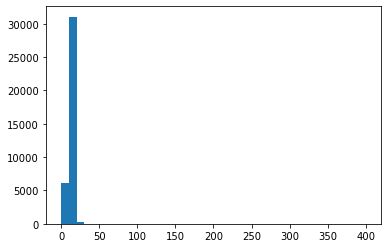

In [65]:
# view sentence length distribution
plt.hist(total_wordcount, bins = np.arange(0,410,10))

In [66]:
inp = Input(shape=(maxlen,))

embed_size = 128
x = Embedding(max_features,embed_size)(inp)

x = LSTM(10, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(9,activation='relu')(x)

x = Dropout(0.1)(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(inputs=inp,outputs=x)
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [67]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',verbose=1,patience=3)

In [68]:
batch_size = 32
epochs = 100
model.fit(X_train,y,batch_size=batch_size,epochs=epochs,validation_split=0.1,callbacks=[early_stop])

Train on 33696 samples, validate on 3744 samples
Epoch 1/100
33696/33696 [==============================] - 60s 2ms/sample - loss: 0.6544 - accuracy: 0.6430 - val_loss: 0.6576 - val_accuracy: 0.6327
Epoch 2/100
33696/33696 [==============================] - 59s 2ms/sample - loss: 0.6492 - accuracy: 0.6429 - val_loss: 0.6608 - val_accuracy: 0.6327
Epoch 3/100
33696/33696 [==============================] - 59s 2ms/sample - loss: 0.6236 - accuracy: 0.6550 - val_loss: 0.6780 - val_accuracy: 0.5975
Epoch 4/100
33696/33696 [==============================] - 59s 2ms/sample - loss: 0.5830 - accuracy: 0.6957 - val_loss: 0.7147 - val_accuracy: 0.5956
Epoch 00004: early stopping


<AxesSubplot:>

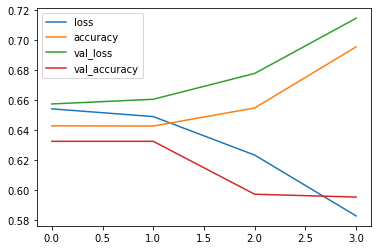

In [69]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [70]:
predicted_prob = model.predict(X_test)
predicted_prob

array([[0.91539663],
       [0.60538346],
       [0.8380881 ],
       ...,
       [0.6614295 ],
       [0.8349215 ],
       [0.56515384]], dtype=float32)

In [71]:
predicted = [] #create binary values

for x in predicted_prob:
    if x < .5:
        predicted.append(0)
    elif x >= .5:
        predicted.append(1)

In [72]:
predicted[:10]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.36      0.15      0.21      5795
         1.0       0.64      0.85      0.73     10251

    accuracy                           0.59     16046
   macro avg       0.50      0.50      0.47     16046
weighted avg       0.54      0.59      0.54     16046

[[ 877 4918]
 [1582 8669]]


In [76]:
model.save('gthack_model.h5')

# Next steps

Create visualization from actual data to support model
- visualize actual data
- network analysis (?)
- performance of neural network
    - find another dataset to validate
        - if network 

In [77]:
pwd

'C:\\Users\\15714\\Documents\\Github\\hackgt7\\model'